In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

iris = load_iris();
data = iris["data"];
#trimming the column names
features = list(map(lambda s : s[:7],iris["feature_names"]));
label = iris["target_names"];

number_of_records = 100;

print("Data type :{}".format(type(iris)));
print("Iris keys : {}".format(iris.keys()));
print("Iris features : {}".format(features));
print("Iris type : {}".format(label));
print("Sample Data :\n {}".format(data[:5]));
print("Target :{}".format(iris["target"][:5]));


df = pd.DataFrame(data[:5],columns=features,index=label[iris["target"][:5]]);
print("Data frame before shuffle : \n {}".format(df));

#iris data shuffling
Xtrain,Xtest,ytrain,ytest = train_test_split(data,iris["target"],random_state=5);

trainDF = pd.DataFrame(Xtrain[:number_of_records],columns=features,index=label[ytrain[:number_of_records]]);
testDF = pd.DataFrame(Xtest[:number_of_records],columns=features,index=label[ytest[:number_of_records]]);

#print("Train frame after shuffle : \n {}".format(trainDF));

#print("Test frame after shuffle : \n {}".format(testDF));

colors = ["#0392cf", "#7bc043", "#ee4035"];
#number of colors must be equal to rows
colors = list(map(lambda x: colors[x],ytrain[:number_of_records]));

pd.plotting.scatter_matrix(trainDF,c=colors,figsize=(15,15));


#creating classifier with train data
classifier = KNeighborsClassifier(n_neighbors= 5);
classifier.fit(Xtrain,ytrain);

ypredict = classifier.predict(Xtest);

predictDF = pd.DataFrame(Xtest,columns=features,index=label[ypredict]);
predictDF["Actual Type"] = label[ytest];
 
#print("\nPredict data frame : \n {}".format(predictDF));

mismatchDataFrame = predictDF.loc[predictDF["Actual Type"] != predictDF.index];

print("\nPredict data mismatch frame : \n {}".format(mismatchDataFrame));

print("Accuracy = {:.2f}".format(np.mean(ypredict == ytest)));

print("Accuracy using classifier = {:.2f}".format(classifier.score(Xtest,ytest)));



Data type :<class 'sklearn.utils.Bunch'>
Iris keys : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Iris features : ['sepal l', 'sepal w', 'petal l', 'petal w']
Iris type : ['setosa' 'versicolor' 'virginica']
Sample Data :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target :[0 0 0 0 0]
Data frame before shuffle : 
         sepal l  sepal w  petal l  petal w
setosa      5.1      3.5      1.4      0.2
setosa      4.9      3.0      1.4      0.2
setosa      4.7      3.2      1.3      0.2
setosa      4.6      3.1      1.5      0.2
setosa      5.0      3.6      1.4      0.2

Predict data mismatch frame : 
            sepal l  sepal w  petal l  petal w Actual Type
virginica      5.9      3.2      4.8      1.8  versicolor
virginica      6.3      2.5      4.9      1.5  versicolor
Accuracy = 0.95
Accuracy using classifier = 0.95


## Confusion and Accuracy is for discrete/classified predication eg. true/false, 0/1, [1,2,3] etc not for random numbers.

confusion matrix : 
[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]
score : 0.9473684210526315


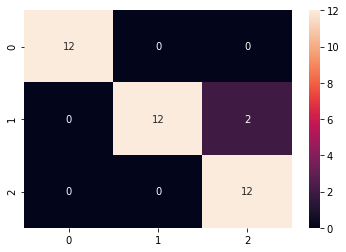

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
cm = confusion_matrix(ytest,ypredict);
print("confusion matrix : \n{}".format(cm));
print("score : {}".format(accuracy_score(ytest,ypredict)));

sns.heatmap(cm,annot=True);
